# Group 5
## Team members:
- Jianting Liu(8950907)
- David (8999846) 
- Marieth (9016702)


## 1. Polynomial Regression (Non-linear regression)



### Use case
This project aims to analyze the relationship between interest rates and house prices in Canada to predict future housing trends. Using historical data, we will evaluate how changes in interest rates impact housing prices over time. The analysis will provide actionable insights for real estate investors and policymakers, helping them understand the influence of monetary policy on housing markets and make data-driven decisions. Accurate predictions can improve investment strategies and support sustainable market growth.

Hypothesis:

Null Hypothesis (H₀): Changes in interest rates have no significant effect on house prices.


Alternative Hypothesis (H₁): Changes in interest rates significantly influence house prices.


In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 
df = pd.read_csv("melted_data_1120.csv")
print(df.head())

         Date  Median income    Population  Mortgage Rate  Interest Rate  \
0  2005-01-01         4487.5  1.069167e+07           5.60           2.75   
1  2005-02-01         4487.5  1.069167e+07           5.59           2.75   
2  2005-03-01         4487.5  1.069167e+07           5.60           2.75   
3  2005-04-01         4487.5  1.071352e+07           5.67           2.75   
4  2005-05-01         4487.5  1.071352e+07           5.55           2.75   

  property_type   price  
0    One_storey  207700  
1    One_storey  208400  
2    One_storey  209200  
3    One_storey  210100  
4    One_storey  210600  


### Implement Pearson's correlation adequately to the purposes and targets of your term project.

Pearson's Correlation Coefficient: -0.414240558292247
P-Value: 1.3707739815515327e-44
We reject H0: and we accept the alternative hypothesis H1. The correlation is statistically significant.


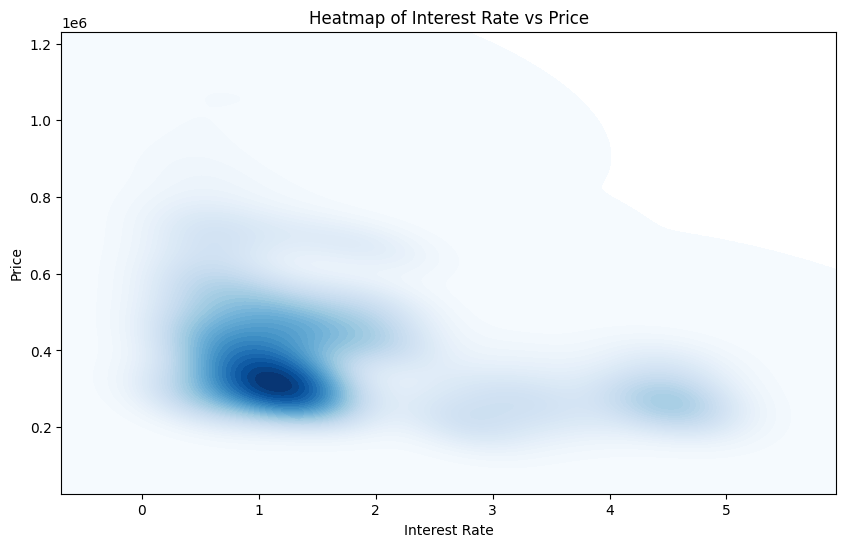

In [30]:
import scipy.stats as stats
# Select the relevant columns: Interest Rate and Price
interest_rate = df['Interest Rate']
price = df['price']

# Calculate Pearson's correlation coefficient
correlation_coefficient, p_value = stats.pearsonr(interest_rate, price)

# Print the results
print(f"Pearson's Correlation Coefficient: {correlation_coefficient}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("We reject H0: and we accept the alternative hypothesis H1. The correlation is statistically significant.")
else:
    print("We cannot reject H0. The correlation is not statistically significant.")

    import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap for the relationship between Interest Rate and Price
plt.figure(figsize=(10, 6))

# Use seaborn's kdeplot to create a heatmap-like density plot
sns.kdeplot(
    x=interest_rate,
    y=price,
    cmap="Blues",
    fill=True,
    thresh=0,
    levels=50
)

# Add labels and title
plt.title("Heatmap of Interest Rate vs Price")
plt.xlabel("Interest Rate")
plt.ylabel("Price")

# Display the heatmap
plt.show()


### Implement Logistic Classification adequately to the purposes and targets of your term project.

Accuracy: 0.5668789808917197
Confusion Matrix:
[[ 64  95]
 [ 41 114]]
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.40      0.48       159
           1       0.55      0.74      0.63       155

    accuracy                           0.57       314
   macro avg       0.58      0.57      0.56       314
weighted avg       0.58      0.57      0.55       314



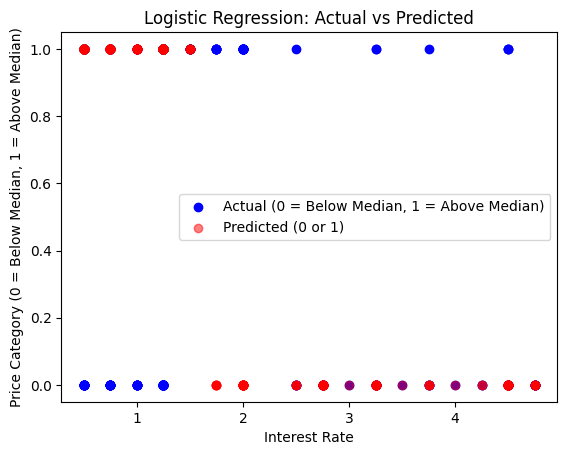

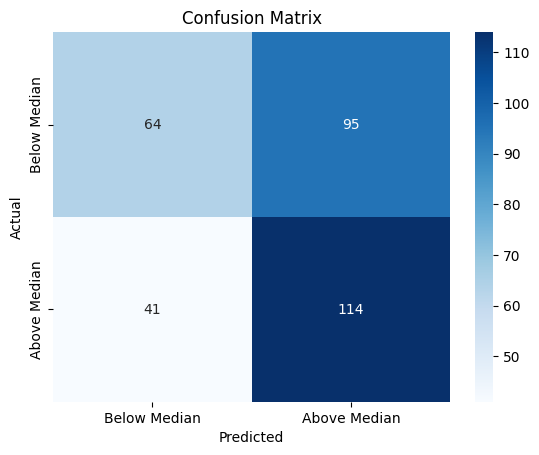

Optimization terminated successfully.
         Current function value: 0.620762
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  price   No. Observations:                 1045
Model:                          Logit   Df Residuals:                     1043
Method:                           MLE   Df Model:                            1
Date:                Tue, 03 Dec 2024   Pseudo R-squ.:                  0.1044
Time:                        11:18:56   Log-Likelihood:                -648.70
converged:                       True   LL-Null:                       -724.33
Covariance Type:            nonrobust   LLR p-value:                 9.116e-35
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.1102      0.117      9.525      0.000       0.882       1.339
Interest Rate    -0.

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import statsmodels.api as sm
# Load the data
df = pd.read_csv("melted_data_1120.csv")

# Preprocessing: Select relevant columns
df = df[['Interest Rate', 'price']]

# Define the target variable dynamically
median_price = df['price'].median()
y = (df['price'] > median_price).astype(int)  # Create binary target variable in memory

# Features remain the same
X = df[['Interest Rate']]
# Rest of the process is unchanged
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(report)
df

import matplotlib.pyplot as plt
import numpy as np

# Scatter plot
plt.scatter(X_test, y_test, color='blue', label='Actual (0 = Below Median, 1 = Above Median)')
plt.scatter(X_test, y_pred, color='red', alpha=0.5, label='Predicted (0 or 1)')

# Add labels and title
plt.xlabel("Interest Rate")
plt.ylabel("Price Category (0 = Below Median, 1 = Above Median)")
plt.title("Logistic Regression: Actual vs Predicted")
plt.legend()
plt.show()
df


import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Below Median', 'Above Median'], yticklabels=['Below Median', 'Above Median'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Adding Statsmodels Logistic Regression Summary
# Add a constant for the intercept term
X_with_constant = sm.add_constant(X)  # Statsmodels requires a constant explicitly

# Fit the model using Statsmodels
sm_model = sm.Logit(y, X_with_constant).fit()

# Print the summary
print(sm_model.summary())





### Summary of the Chart
The chart shows the results of a logistic regression model applied to predict house prices (Above Median = 1 or Below Median = 0) based on the interest rate. 

Key Observations:
- The chart shows a distinct clustering of points at 0 and 1, indicating that the model is trying to separate the data based on interest rate.
- There seems to be little variation in the predicted values across interest rates, suggesting that the data may not have a strong linear separability for this feature.

**Insights:**
- The predictions are fairly aligned with the actual values, but some deviations (misclassifications) are visible.
- Logistic regression might need additional features or transformations to better capture the relationship between interest rate and price category.

### Implement spearman's correlation adequately to the purposes and targets of your term project.

Spearman's Correlation Coefficient: -0.41039412947580445
P-value: 1.0151002048458779e-43
The correlation is statistically significant.


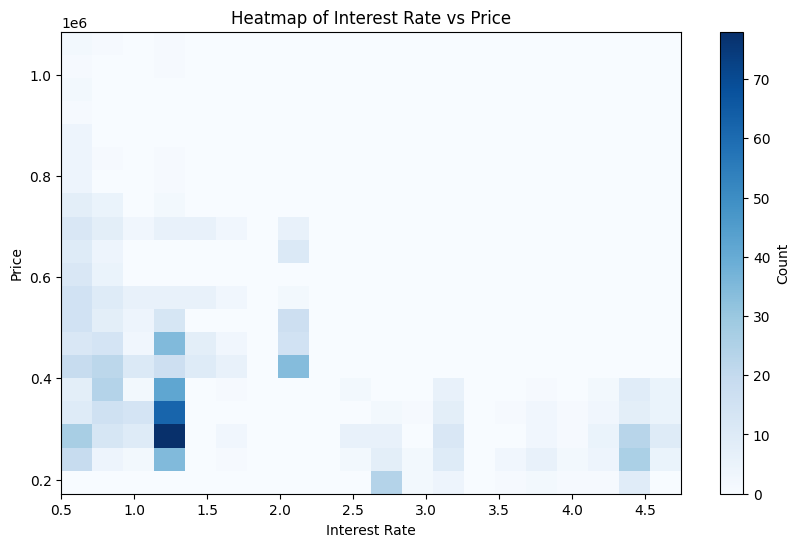

In [29]:
import pandas as pd
from scipy.stats import spearmanr

# Load the data
df = pd.read_csv("melted_data_1120.csv")

# Preprocessing: Select relevant columns
df = df[['Interest Rate', 'price']]

# Check for missing values and drop them if any
df = df.dropna()

# Calculate Spearman's correlation
correlation, p_value = spearmanr(df['Interest Rate'], df['price'])

# Display the results
print(f"Spearman's Correlation Coefficient: {correlation}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")

# Optional: Visualize the relationship
import matplotlib.pyplot as plt
import seaborn as sns

# Define a heatmap using a 2D histogram (density-based approach)
plt.figure(figsize=(10, 6))
heatmap, xedges, yedges, _ = plt.hist2d(
    df['Interest Rate'], df['price'], bins=[20, 20], cmap='Blues'  # Adjust bins as needed
)
plt.colorbar(label='Count')  # Add a color bar to indicate density
plt.title("Heatmap of Interest Rate vs Price")
plt.xlabel("Interest Rate")
plt.ylabel("Price")
plt.show()



### Implement Probabilistic Reasoning adequately to the purposes and targets of your term project.

Conditional Probability Table:
price          Very Low       Low  Moderate      High  Very High
Interest Rate                                                   
Very Low       0.000000  0.461443  0.399254  0.120647   0.018657
Low            0.125000  0.875000  0.000000  0.000000   0.000000
Moderate       0.017391  0.982609  0.000000  0.000000   0.000000

Probabilities of price categories for interest rate 'Low':
price
Very Low     0.125
Low          0.875
Moderate     0.000
High         0.000
Very High    0.000
Name: Low, dtype: float64


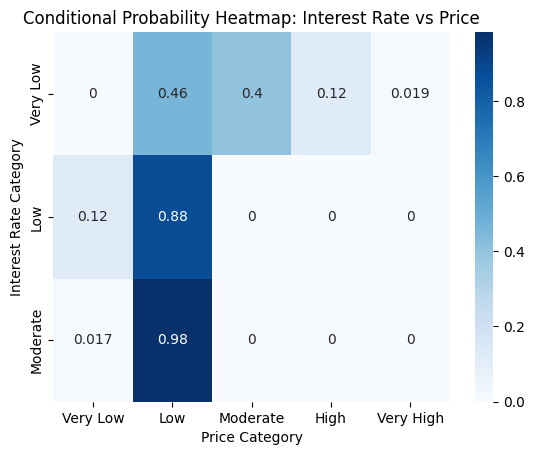

,Interest Rate,price
0,2.75,207700
1,2.75,208400
2,2.75,209200
3,2.75,210100
4,2.75,210600
...,...,...
1040,0.50,810100
1041,0.50,834700
1042,0.75,834300
1043,1.25,819800


In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("melted_data_1120.csv")

# Preprocessing: Select relevant columns and handle missing values
df = df[['Interest Rate', 'price']].dropna()

# Define bins and labels for interest rates
bins_interest_rate = [0, 2, 4, 6, 8]  # Example bins for interest rates
labels_interest_rate = ['Very Low', 'Low', 'Moderate', 'High']

# Define bins and labels for house prices
bins_price = [0, 200000, 400000, 600000, 800000, 1000000]  # Example bins for price
labels_price = ['Very Low', 'Low', 'Moderate', 'High', 'Very High']

# Dynamically bin interest rates and house prices without modifying the original dataframe
interest_rate_categories = pd.cut(df['Interest Rate'], bins=bins_interest_rate, labels=labels_interest_rate, include_lowest=True)
price_categories = pd.cut(df['price'], bins=bins_price, labels=labels_price, include_lowest=True)

# Calculate conditional probabilities dynamically
prob_table = pd.crosstab(interest_rate_categories, price_categories, normalize='index')

# Display the probability table
print("Conditional Probability Table:")
print(prob_table)

# Example: Given an interest rate category, predict the likelihood of each price category
interest_rate_input = 'Low'  # Example input
if interest_rate_input in prob_table.index:
    print(f"\nProbabilities of price categories for interest rate '{interest_rate_input}':")
    print(prob_table.loc[interest_rate_input])
else:
    print(f"No data available for interest rate category '{interest_rate_input}'.")

# Visualize the probability distribution
sns.heatmap(prob_table, annot=True, cmap="Blues")
plt.title("Conditional Probability Heatmap: Interest Rate vs Price")
plt.xlabel("Price Category")
plt.ylabel("Interest Rate Category")
plt.show()
df

In [27]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt

# Select the variables
X = df['Interest Rate'].values
y = df['price'].values

# Normalize the interest rate for better convergence
X_normalized = (X - X.mean()) / X.std()

# Set up the Bayesian Linear Regression model
with pm.Model() as model:
    # Priors (prior distributions) for the coefficients
    alpha = pm.Normal('alpha', mu=0, sigma=10)
    beta = pm.Normal('beta', mu=0, sigma=10)
    
    # Prior for the error term (standard deviation)
    sigma = pm.HalfNormal('sigma', sigma=1)
    
    # Define the linear regression model
    mu = alpha + beta * X_normalized
    
    # Likelihood (conditional probability of the data given the parameters)
    likelihood = pm.Normal('y', mu=mu, sigma=sigma, observed=y)
    
    # Perform MCMC sampling (Markov Chain Monte Carlo)
    trace = pm.sample(2000, return_inferencedata=False)

# Visualize the results
pm.traceplot(trace)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/theano/scalar/basic.py:2412: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  self.ctor = getattr(np, o_type.dtype)


AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations